In [1]:
from array import array
import numpy as np
import math

In [2]:
# Initial Conditions
speed = 45.0
theta = 15.0
y1 = 2.0


# Other constants
Cd = 0.35 # drag coefficient
area = 0.004359 # cross sectional area of projectile
grav = 9.81 # gravitional acceleration
mass = 0.145 # mass in kg
rho = 1.2 # density of air (kg/m^3)
air_const = -0.5*Cd*rho*area/mass
Pi = math.pi

# coefficients of restiution in x and y directions
coeff_rest_x = 0.80
coeff_rest_y = 0.35

In [3]:
r1 = array('d')
v1 = array('d')
r = array('d')
v = array('d')
accel = array('d')

r1.append(0)
r1.append(y1)
v1.append(speed*math.cos(theta*Pi/180.0))
v1.append(speed*math.sin(theta*Pi/180.0))

r.append(r1[0])
r.append(r1[1])
v.append(v1[0])
v.append(v1[1])
accel.append(0)
accel.append(0)

In [4]:
tau = 0.001 # timestep in seconds
maxStep = 1000000 # maximum number of steps

xplot = array('d')
yplot = array('d')
xNoAir = array('d')
yNoAir = array('d')
time = array('d')

In [5]:
endtime = 0
nelements = 0

tNoAirOffset = 0.0

for iStep in range(1,maxStep+1):
    xplot.append(r[0])
    yplot.append(r[1])
    t = (iStep-1)*tau
    tg = t - tNoAirOffset
    
    xNoAir.append(r1[0]+v1[0]*tg)
    yNoAir.append(r1[1]+v1[1]*tg-0.5*grav*tg*tg)
    #print ("Step = %d: x = %f y = %f   vx = %f vy = %f" % (iStep,xNoAir[iStep-1],yNoAir[iStep-1], v1[0], (v1[1]-grav*tg)))
    if (yNoAir[iStep-1] < 0.001):
        print ("Bounce: x = %f y = %f   vx = %f vy = %f" % (xNoAir[iStep-1],yNoAir[iStep-1], v1[0], (v1[1]-grav*tg)))
        v1[0]=coeff_rest_x*v1[0]
        v1[1]=-1.0*coeff_rest_y*(v1[1]-grav*tg)
        r1[1]=0.001
        r1[0]=xNoAir[iStep-1]
        tNoAirOffset=t
        print ("Restart: x = %f y = %f   vx = %f vy = %f" % (r1[0],r1[1], v1[0], v1[1]))
    
    normV = math.sqrt(v[0]*v[0]+v[1]*v[1])
    accel[0]=air_const*normV*v[0]
    accel[1]=air_const*normV*v[1]-grav
    
    # Euler Method
    #r[0] = r[0] + tau*v[0]
    #r[1] = r[1] + tau*v[1]
    #v[0] = v[0] + tau*accel[0]
    #v[1] = v[1] + tau*accel[1]
    
    # Euler-Cromer Method
    #v[0] = v[0] + tau*accel[0]
    #v[1] = v[1] + tau*accel[1]    
    #r[0] = r[0] + tau*v[0]
    #r[1] = r[1] + tau*v[1]
    
    # MidPoint Method
    vxnew = v[0] + tau*accel[0]
    vynew = v[1] + tau*accel[1]
    r[0] = r[0] + tau*(v[0] + vxnew)/2.0
    r[1] = r[1] + tau*(v[1] + vynew)/2.0
    v[0] = vxnew
    v[1] = vynew    
    
    #print ("x = %f     vx = %f    ax = %f" %(r[0],v[0],accel[0]))
    #print ("y = %f     vy = %f    ay = %f" %(r[1],v[1],accel[1]))
    
    time.append(tau*(iStep-1))
    
    if (r[1] < 0.001):
        v[1]=-v[1]*coeff_rest_y
        v[0]=v[0]*coeff_rest_x
        r[1]=0.001
    
    if (normV < 1.0):
        xplot.append(r[0])
        yplot.append(r[1])
        time.append(tau*iStep)
        endtime = tau*iStep
        nelements = iStep
        break
        
print ("Maximum range is %f meters." % r[0])
print ("Theory maximum range is %f meters." % (speed*speed/grav*math.sin(2.0*theta*Pi/180.0)))
print (" ")

print ("Time of flight is %f seconds." % endtime)
print ("Theory time of flight is %f seconds." % (2.0*speed/grav*math.sin(theta*Pi/180.0)))
print (" ")

max_y = np.amax(yplot)+1
max_x = np.amax(xplot)+1
max_t = np.amax(time)+1

print ("Max y = %f" % max_y)
print ("Theory Max y = %f" % (speed*speed/(2.0*grav)*math.pow(math.sin(theta*Pi/180.0),2)))
print (" ")


print ("Number of elements = %d" % nelements)

Bounce: x = 110.231455 y = -0.009077   vx = 43.466662 vy = -13.231303
Restart: x = 110.231455 y = 0.001000   vx = 34.773330 vy = 4.630956
Bounce: x = 143.092252 y = -0.003034   vx = 34.773330 vy = -4.639494
Restart: x = 143.092252 y = 0.001000   vx = 27.818664 vy = 1.623823
Maximum range is 100.143784 meters.
Theory maximum range is 103.211009 meters.
 
Time of flight is 3.580000 seconds.
Theory time of flight is 2.374487 seconds.
 
Max y = 8.746439
Theory Max y = 6.913827
 
Number of elements = 3580


In [6]:
from ROOT import TCanvas
from ROOT import TGraph
from ROOT import gStyle

xcanvas = 1000
ycanvas = 500

c1 = TCanvas( 'c1', 'XY Projectile', 0, 0, xcanvas, ycanvas )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

c2 = TCanvas( 'c2', 'XT Projectile', 0, 0, xcanvas, ycanvas )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )

c3 = TCanvas( 'c3', 'YT Projectile', 0, 0, xcanvas, ycanvas )
c3.SetGridx()
c3.SetGridy()
c3.GetFrame().SetFillColor( 21 )
c3.GetFrame().SetBorderMode(-1 )
c3.GetFrame().SetBorderSize( 5 )

gr = TGraph(nelements,xplot,yplot)
grr = TGraph(nelements,xNoAir,yNoAir)

gxt = TGraph(nelements,time,xplot)
gxtt = TGraph(nelements,time,xNoAir)

gyt = TGraph(nelements,time,yplot)
gytt = TGraph(nelements,time,yNoAir)

Welcome to JupyROOT 6.18/00


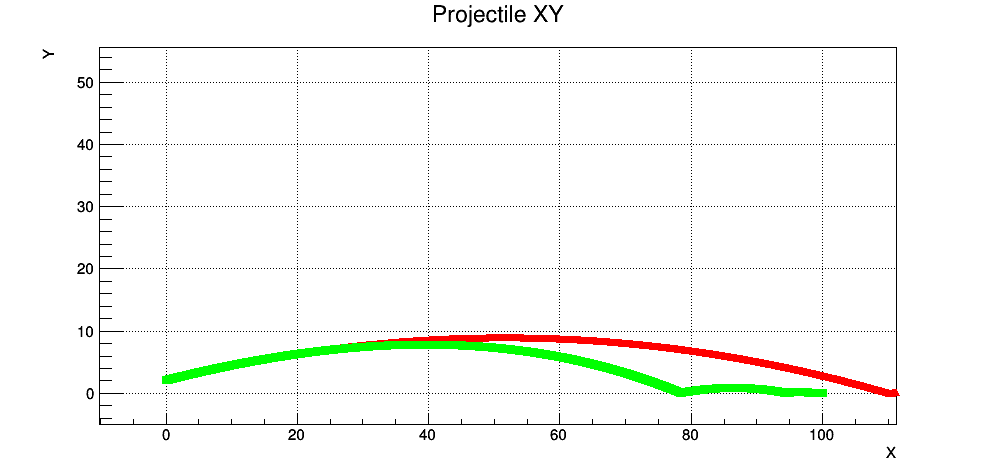

In [7]:
gr.SetMarkerColor(3)
grr.SetMarkerColor(2)
gr.SetMarkerStyle(21)
grr.SetMarkerStyle(22)
grr.SetTitle("Projectile XY")
grr.GetXaxis().SetTitle("X")
grr.GetYaxis().SetTitle("Y")
axis = grr.GetXaxis()
axis.SetLimits(-0.1*max_x,1.1*max_x)
grr.GetHistogram().SetMaximum(1.1*max_x*ycanvas/xcanvas)
grr.GetHistogram().SetMinimum(-0.1*max_x*ycanvas/xcanvas)

c1.cd()
grr.Draw("AP")
gr.Draw("P")
c1.Draw()

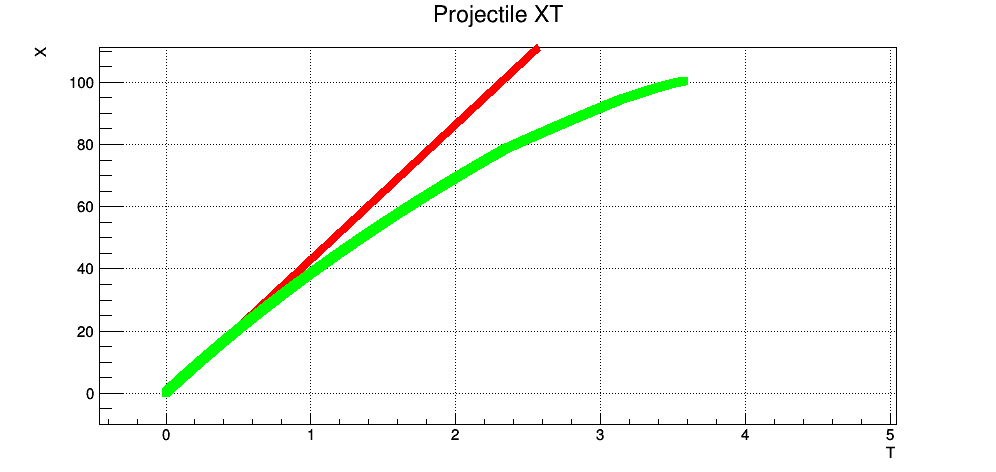

In [8]:
gxt.SetMarkerColor(3)
gxtt.SetMarkerColor(2)
gxt.SetMarkerStyle(21)
gxtt.SetMarkerStyle(22)
gxtt.SetTitle("Projectile XT")
gxtt.GetXaxis().SetTitle("T")
gxtt.GetYaxis().SetTitle("X")
axis = gxtt.GetXaxis()
axis.SetLimits(-0.1*max_t,1.1*max_t)
gxtt.GetHistogram().SetMaximum(1.1*max_x)
gxtt.GetHistogram().SetMinimum(-0.1*max_x)

c2.cd()
gxtt.Draw("AP")
gxt.Draw("P")
c2.Draw()

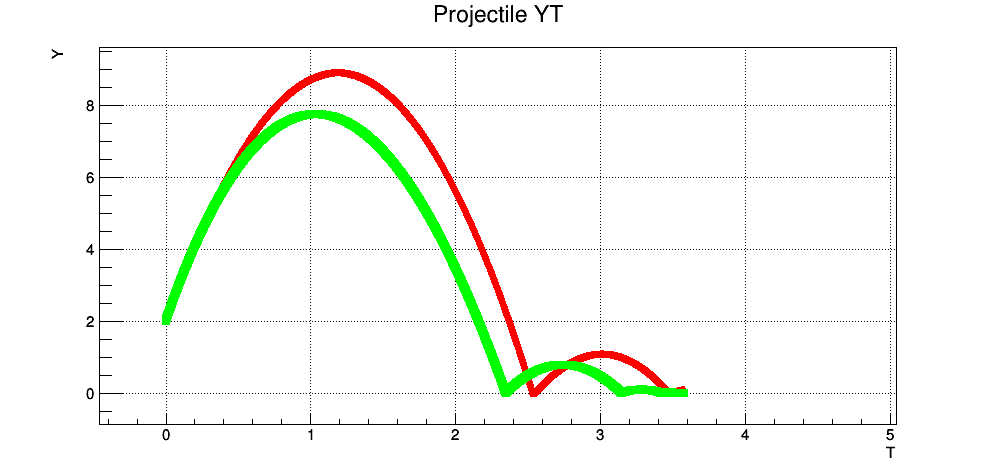

In [9]:
gyt.SetMarkerColor(3)
gytt.SetMarkerColor(2)
gyt.SetMarkerStyle(21)
gytt.SetMarkerStyle(22)
gytt.SetTitle("Projectile YT")
gytt.GetXaxis().SetTitle("T")
gytt.GetYaxis().SetTitle("Y")
axis = gytt.GetXaxis()
axis.SetLimits(-0.1*max_t,1.1*max_t)
gytt.GetHistogram().SetMaximum(1.1*max_y)
gytt.GetHistogram().SetMinimum(-0.1*max_y)

c3.cd()
gytt.Draw("AP")
gyt.Draw("P")
c3.Draw()